In [6]:
5*(120,90)


(120, 90, 120, 90, 120, 90, 120, 90, 120, 90)

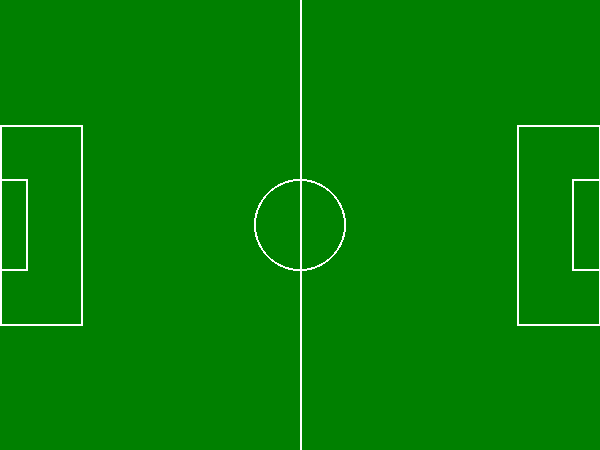

In [7]:
from gymnasium.core import RenderFrame
from PIL import Image, ImageDraw

scale = 5

width, height = 120 * scale, 90 * scale
field = Image.new("RGB", (width, height), "green")  # Green background for the field

# Use PIL's drawing module to add field lines or other details
draw = ImageDraw.Draw(field)

# Drawing center line and circle
draw.line([(width / 2, 0), (width / 2, height)], fill="white", width=2)  # Center line

center_line_radius = 9.15 * scale

draw.ellipse(xy=[
    (width / 2 - center_line_radius, height / 2 - center_line_radius),
    (width / 2 + center_line_radius, height / 2 + center_line_radius)], width=2)

outer_goal_height = 40 * scale
outer_goal_width = 16.5 * scale

inner_goal_height = 18.3 * scale
inner_goal_width = 5.5 * scale

goal_size = 7.32 * scale

# Drawing goals
draw.rectangle(xy=[
    (0, height / 2 - outer_goal_height / 2),
    (outer_goal_width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (0, height / 2 - inner_goal_height / 2),
    (inner_goal_width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (0, height / 2 - goal_size / 2),
    (0, height / 2 + goal_size / 2),
])

draw.rectangle(xy=[
    (width - outer_goal_width, height / 2 - outer_goal_height / 2),
    (width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (width - inner_goal_width, height / 2 - inner_goal_height / 2),
    (width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (width, height / 2 - goal_size / 2),
    (width, height / 2 + goal_size / 2),
])

field


c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:295: UserWarning: WARN: Human rendering should return `None`, got <class 'PIL.Image.Image'>
  logger.warn(


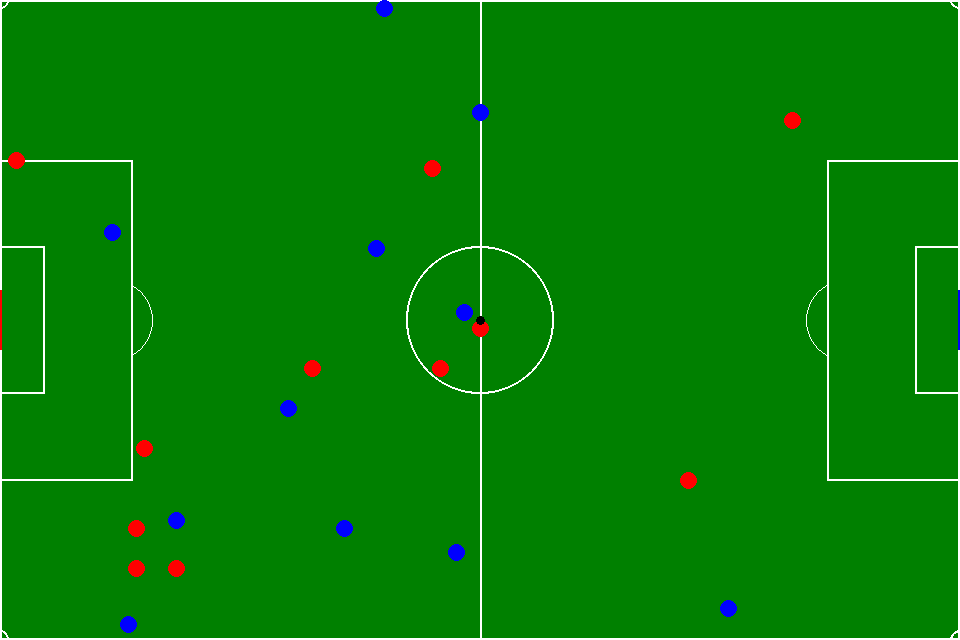

In [8]:
import gymnasium as gym
import env
from PIL import ImageChops 

env = gym.make("Soccer-v0", render_mode="human")

env.reset()

# env.step(0)

env.render()


### Observa a movimentação de cada ponto no campo
- Cada imagem mostra o ponto que moveu antes e depois simultaneamente
- Aumentar Velocity em constants.py deve facilitar visualizar a diferença
- Porque todas images de movimento azul estão pertas ? pq nenhum azul se moveu
- TODO: descobrir pq nenhum azul se moveu

In [ ]:
import gymnasium as gym
import env
import random
from PIL import ImageChops , ImageOps

env = gym.make("Soccer-v0")

actions = list(range(8))

env.reset()

def img_process_pipeline(
        original_img, 
        replace_colors = False, 
        to_gray = False
    ): 
    modified_image = original_img

    if replace_colors:
        # Define the colors to replace (you can specify the exact RGB values)
        colors_to_replace = [(255, 0, 0), (0, 0, 255)]  # Red and Blue
        
        # Define the replacement color
        replacement_color = (255, 255, 255)  # White

        # Create a list of pixel data with colors replaced
        new_data = []

        for pixel in original_img.getdata():
            if pixel[:3] in colors_to_replace:
                new_data.append(replacement_color)
            else:
                new_data.append(pixel)

        # Create a new image with the replaced colors
        modified_image = Image.new(original_img.mode, original_img.size)
        modified_image.putdata(new_data)

    if to_gray:
        modified_image = ImageOps.grayscale(modified_image)

    return modified_image

def images_per_team_complete_action(n = 2):
    first_image = env.render()
    images = [img_process_pipeline(first_image)]
    # display(images[0])
    for team_turn in range(2):
        for _ in range(11): # Left team action
            env.step(random.choice(actions))
            images.append(img_process_pipeline(env.render()))
            # display(images[_+1])

        differences = []
        for i in range(len(images) - 1): # Iterate over pairs of images
            image1 = images[i]
            image2 = images[i + 1] 
            diff = ImageChops.difference(image2, image1)
            differences.append(diff)

        for i in differences:
            display(i)

            pixel_data = list(i.getdata())
            total_pixel_sum = sum(sum(pixel) for pixel in pixel_data)

            if total_pixel_sum == 0:
                print("Imagem está toda preta, jogador não se moveu")


        # Reset images to recalculate for right team
        images = [images[-1]]

images_per_team_complete_action(2)


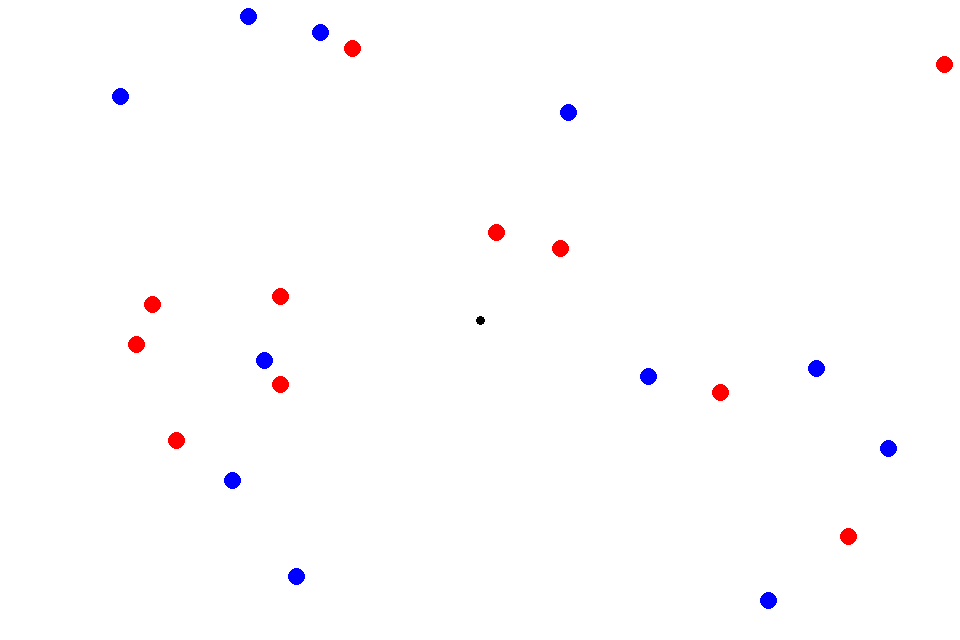

left_team player_0 move from ([106.  67.]) to ([80. 67.]) Indexes(0, 0)


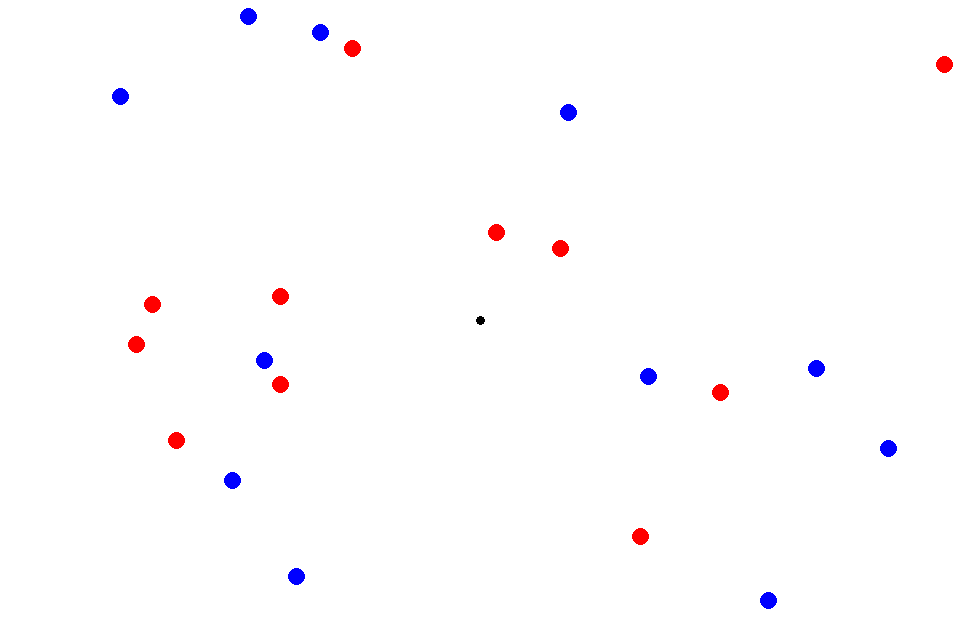

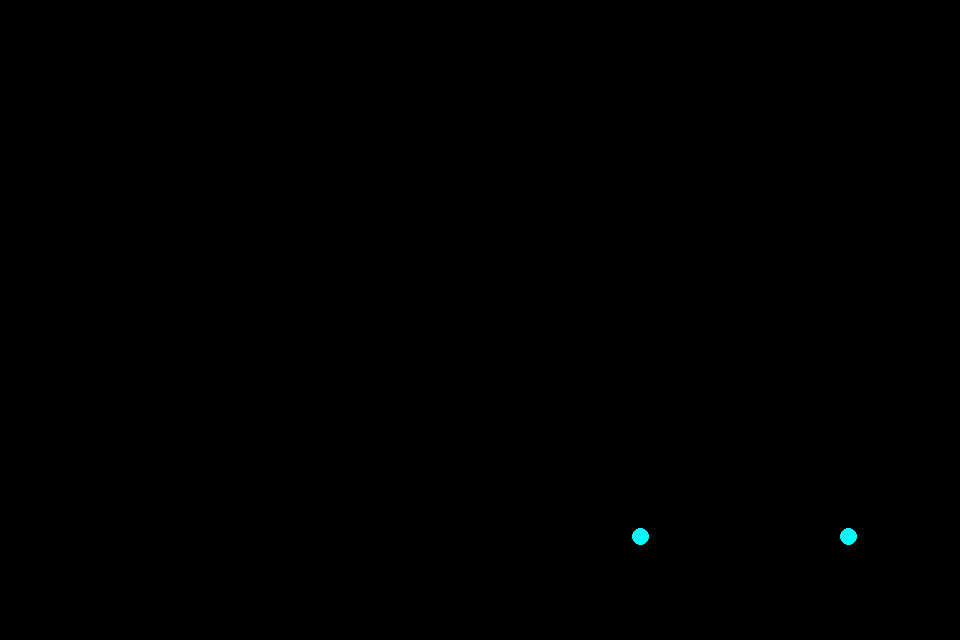

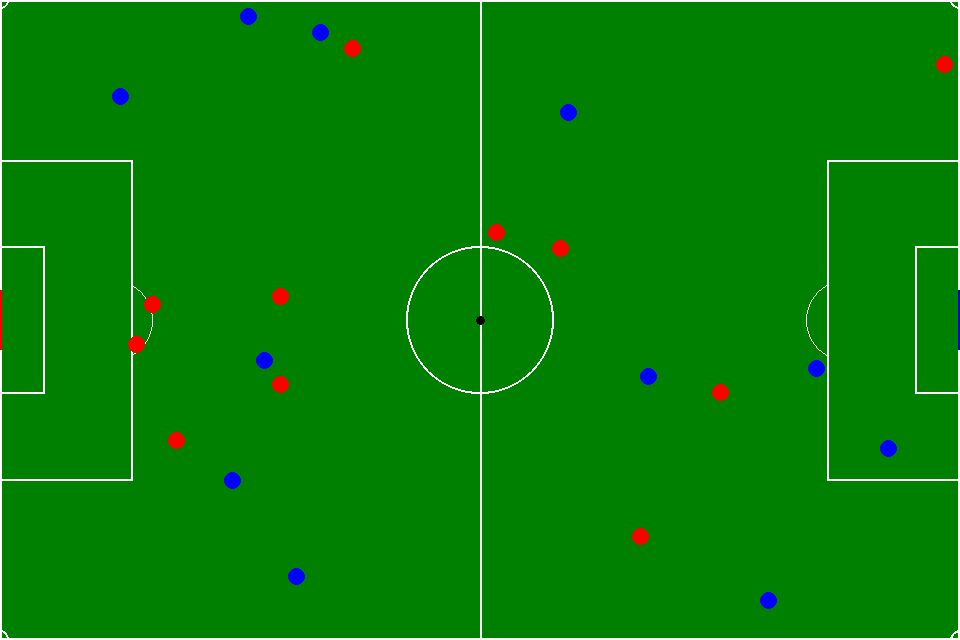

In [4]:
import gymnasium as gym
import env
import numpy as np
from IPython.display import Image, display
from PIL import Image, ImageChops 


#env = gym.make("Soccer-v0", render_mode="human", observation_format="dict")

env = gym.make("Soccer-v0")

obs, _  = env.reset()
image1 = obs
obs = np.array(obs, dtype=np.uint8)
image = Image.fromarray(obs)
display(image)

#print(obs)

obs, _,_,_, _ = env.step(0)
image2 = obs
obs = np.array(obs, dtype=np.uint8)
image = Image.fromarray(obs)
display(image)



diff = ImageChops.difference(image2, image1)
display(diff)
env.render()